# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [3]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df["target"]
X = df.drop(columns = ["target"], axis = 1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [11]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C = 1e12, solver = 'liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Write a function to calculate the precision

In [12]:
def precision(y, y_hat):
    # Your code here
    
    TP = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==1])
    TN = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==0])
    FP = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==1])
    FN = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==0])
    
    real_p = len([1 for i in y if i==1])
    pred_p = len([1 for i in y_hat if i==1])
    
    pecision = (TP) / pred_p
    
    return pecision 

    

## Write a function to calculate the recall

In [13]:
def recall(y, y_hat):
    # Your code here
    TP = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==1])
    TN = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==0])
    FP = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==1])
    FN = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==0])
    
    real_p = len([1 for i in y if i==1])
    pred_p = len([1 for i in y_hat if i==1])
    
    recall = (TP) / real_p
    
    return recall 

## Write a function to calculate the accuracy

In [22]:
def accuracy(y, y_hat):
    # Your code here
    TP = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==1])
    TN = len([1 for (i,j) in list(zip(y, y_hat)) if i==j and j==0])
    FP = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==1])
    FN = len([1 for (i,j) in list(zip(y, y_hat)) if i!=j and j==0])
    
    real_p = len([1 for i in y if i==1])
    pred_p = len([1 for i in y_hat if i==1])
    
    accuracy = (TP + TN) / len(y)
    
    return accuracy 

## Write a function to calculate the F1 score

In [25]:
def f1(y, y_hat):
    # Your code here
    p = precision(y, y_hat)
    r = recall(y, y_hat)
    f1_score = 2 * p * r / (p + r)
    return f1_score

## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [26]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

print("Training Percision is : ", precision(y_train, y_hat_train))
print("Test Percision is     : ", precision(y_test, y_hat_test))

print()
print("Training Recall is : ", recall(y_train, y_hat_train))
print("Test Recall is     : ", recall(y_test, y_hat_test))

print()
print("Training Accuracy is : ", accuracy(y_train, y_hat_train))
print("Test Accuracy is     : ", accuracy(y_test, y_hat_test))

print()
print("Training F1 is : ", f1(y_train, y_hat_train))
print("Test F1 is     : ", f1(y_test, y_hat_test))

Training Percision is :  0.8396946564885496
Test Percision is     :  0.8125

Training Recall is :  0.9016393442622951
Test Recall is     :  0.9069767441860465

Training Accuracy is :  0.8546255506607929
Test Accuracy is     :  0.8289473684210527

Training F1 is :  0.8695652173913043
Test F1 is     :  0.8571428571428572


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [27]:
# Your code here

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



print("SKLearn")
print("Training Percision is : ", precision_score(y_train, y_hat_train))
print("Test Percision is     : ", precision_score(y_test, y_hat_test))
print()
print("Model")
print("Training Percision is : ", precision(y_train, y_hat_train))
print("Test Percision is     : ", precision(y_test, y_hat_test))
print("---------------------------------------------------------")


print("SKLearn")
print("Training Recall is : ", recall_score(y_train, y_hat_train))
print("Test Recall is     : ", recall_score(y_test, y_hat_test))
print()
print("Model")
print("Training Recall is : ", recall(y_train, y_hat_train))
print("Test Recall is     : ", recall(y_test, y_hat_test))
print("---------------------------------------------------------")


print("SKLearn")
print("Training Accuracy is : ", accuracy_score(y_train, y_hat_train))
print("Test Accuracy is     : ", accuracy_score(y_test, y_hat_test))
print()
print("Model")
print("Training Accuracy is : ", accuracy(y_train, y_hat_train))
print("Test Accuracy is     : ", accuracy(y_test, y_hat_test))
print("---------------------------------------------------------")



print("SKLearn")
print("Training F1 is : ", f1_score(y_train, y_hat_train))
print("Test F1 is     : ", f1_score(y_test, y_hat_test))
print()
print("Model")
print("Training F1 is : ", f1(y_train, y_hat_train))
print("Test F1 is     : ", f1(y_test, y_hat_test))


SKLearn
Training Percision is :  0.8396946564885496
Test Percision is     :  0.8125

Model
Training Percision is :  0.8396946564885496
Test Percision is     :  0.8125
---------------------------------------------------------
SKLearn
Training Recall is :  0.9016393442622951
Test Recall is     :  0.9069767441860465

Model
Training Recall is :  0.9016393442622951
Test Recall is     :  0.9069767441860465
---------------------------------------------------------
SKLearn
Training Accuracy is :  0.8546255506607929
Test Accuracy is     :  0.8289473684210527

Model
Training Accuracy is :  0.8546255506607929
Test Accuracy is     :  0.8289473684210527
---------------------------------------------------------
SKLearn
Training F1 is :  0.8695652173913043
Test F1 is     :  0.8571428571428572

Model
Training F1 is :  0.8695652173913043
Test F1 is     :  0.8571428571428572


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train) 
    
    # Your code here
    training_precision.append(precision(y_train, y_hat_train))
    testing_precision.append(precision(y_test, y_hat_test))
    training_recall.append(recall(y_train, y_hat_train))
    testing_recall.append(recall(y_test, y_hat_test))
    training_accuracy.append(accuracy(y_train, y_hat_train))
    testing_accuracy.append(accuracy(y_test, y_hat_test))
    training_f1.append(f1(y_train, y_hat_train))
    testing_f1.append(f1(y_test, y_hat_test))


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

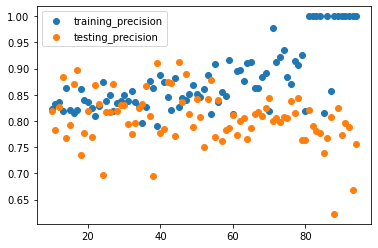

In [34]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

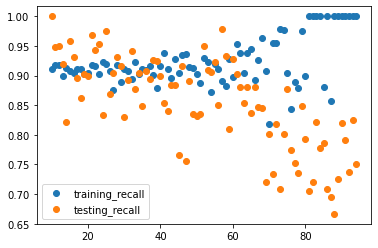

In [35]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

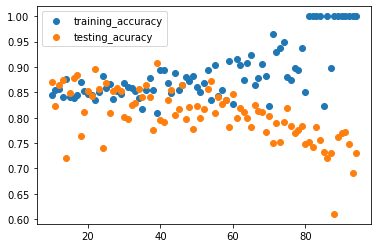

In [36]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_acuracy')
plt.legend()
plt.show()

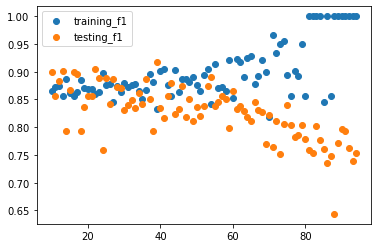

In [37]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.